# Bias-Variance trade-off (theory)

>As usual, we are given a dataset $D=\{(x_1,y_1),\ldots,(x_n,y_n)\}$, drawn i.i.d. from some distribution $P(X,Y)$. Throughout this lecture we assume a regression setting, i.e. $y \in \mathbb{R}$. In this lecture we will decompose the generalization error of a classifier into three rather interpretable terms. Before we do that, let us consider that for any given input $\mathbb{x}$ there might not exist a unique label $y$. For example, if your vector $\mathbb{x}$ describes features of house (e.g. #bedrooms, square footage, ...) and the label $y$ its price, you could imagine two houses with identical description selling for different prices. So for any given feature vector $\mathbb{x}$, there is a distribution over possible labels. We therefore define the following, which will come in useful later on:
>
>**Expected Label (given $\mathbb{x} \in \mathbb{R}^d$):**
>
>$$\bar{y}(\mathbb{x}) = \mathbb{E}_{y|x}[Y] = \int_{y} y\,\text{Pr}(y|\mathbb{x}) \partial y.$$
>
>The expected label denotes the label you would expect to obtain, given a feature vector $\mathbb{x}$.

>Alright, so we draw our training set $D$, consisting of $n$ inputs, i.i.d. from the distribution $P$. As a second step we typically call some machine learning algorithm $\mathcal{A}$ on this data set to learn a hypothesis (aka classifier). Formally, we denote this process as $h_D=\mathcal{A}(D)$.
>
>For a given $h_D$, learned on data set $D$ with algorithm $\mathcal{A}$, we can compute the generalization error (as measured in squared loss) as follows:
>
>**Expected Test Error (given $h_D$)**:
>
>$$\mathbb{E}_{(\mathbb{x},y)∼P} \Big[{(h_D(\mathbb{x})−y)}^{2}\Big]=\int_{x}\int_{y}{(h_D(\mathbb{x})−y)}^{2} \,\text{Pr}(\mathbb{x},y)\partial y \partial \mathbb{x}.$$
>
>Note that one can use other loss functions. We use squared loss because it has nice mathematical properties, and it is also the most common loss function.

>The previous statement is true for a given training set $D$. However, remember that $D$ itself is drawn from $P^n$, and is therefore a random variable. Further, $h_D$ is a function of $D$, and is therefore also a random variable. And we can of course compute its expectation:
>
>**Expected Classifier (given $\mathcal{A}$)**:
>
>$$\bar{h}=\mathbb{E}_{D∼P^n}[h_D]=\int_{D}h_D\, \text{Pr}(D)\partial D$$
>
>where $\text{Pr}(D)$ is the probability of drawing $D$ from $P^n$. Here, $\bar{h}$ is a weighted average over functions.

>We can also use the fact that $h_D$ is a random variable to compute the expected test error only given $\mathcal{A}$, taking the expectation also over $D$.
>
>**Expected Test Error (given $\mathcal{A}$)**:
>
>$$\mathbb{E}_{{(\mathbb{x},y)∼P}\atop{D∼P^n}} \, \Big[{(h_D(\mathbb{x})−y)}^2\Big] = \int_{D}\int_{\mathbb{x}}\int_{y} ({h_D(\mathbb{x})−y)}^2 \, \text{P}(\mathbb{x},y) \, \text{P}(D) \partial y \partial x \partial D$$
>
>To be clear, $D$ is our training points and the $(\mathbb{x},y)$ pairs are the test points.
>
>We are interested in exactly this expression, because it evaluates the quality of a machine learning algorithm $\mathcal{A}$ with respect to a data distribution $P(X,Y)$. In the following we will show that this expression decomposes into three meaningful terms.

```{margin} Copy-Paste Notice!
This is a copy-paste of the [lecture 12 of the course cs4780](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote12.html).
I added some code examples below to allow the students play with the formulas and added some comments and concepts that I thought would be helpful for the students in our class.
```

> ## Decomposition of Expected Test Error

>
>\begin{align*} 
\mathbb{E}_{\mathbb{x},y,D}\Big[[{h_D(\mathbb{x})−y]}^2 \Big] &= \mathbb{E}_{\mathbb{x},y,D}\Big[\big[{\big(h_D(\mathbb{x})−\bar{h}(\mathbb{x})\big)+\big(\bar{h}(\mathbb{x})−y\big)\big]}^2 \Big] \\ 
&=\mathbb{E}_{\mathbb{x},D}[{(\bar{h}_D(\mathbb{x})−\bar{h}(\mathbb{x}))}^2]
+\mathbb{E}_{\mathbb{x},y}[{(\bar{h}(\mathbb{x})−y)}^2 ] + 2\, \mathbb{E}_{\mathbb{x},y,D}[(h_D(\mathbb{x})−\bar{h}(\mathbb{x}))(\bar{h}(\mathbb{x})−y)]
\end{align*}
>
>The middle term of the above equation is 0 as we show below
>
>\begin{align*} 
\mathbb{E}_{\mathbb{x},y,D} \Big[(h_D(x)−\bar{h}(\mathbb{x}))(\bar{h}(\mathbb{x})−y)\Big] &= \mathbb{E}_{\mathbb{x},y} \Big[\mathbb{E}_D[h_D(\mathbb{x})−\bar{h}(\mathbb{x})](\bar{h}(\mathbb{x})−y) \Big] \\
&=\mathbb{E}_{\mathbb{x},y} \Big[(\mathbb{E}_D[h_D(\mathbb{x})]−\bar{h}(\mathbb{x}))(\bar{h}(\mathbb{x})−y) \Big] \\
&=\mathbb{E}_{\mathbb{x},y} \Big[(\bar{h}(\mathbb{x})−\bar{h}(\mathbb{x}))(\bar{h}(\mathbb{x})−y) \Big] \\
&=\mathbb{E}_{\mathbb{x},y}[0] \\
&=0
\end{align*}
>
>Returning to the earlier expression, we're left with the variance and another term
>
>\begin{align*}
\mathbb{E}_{x,y,D} \Big[({h_D(\mathbb{x})−y)}^2 \big]
&= \underbrace {\mathbb{E}_{\mathbb{x},D} \Big[ {(h_D(\mathbb{x})−\bar{h}(\mathbb{x}))}^2 \Big]}_{\text{Variance}}+\mathbb{E}_{\mathbb{x},y} \Big[ {(\bar{h}(\mathbb{x})−y)}^2 \Big]
\end{align*}
>
>We can break down the second term in the above equation as follows:
>
>\begin{align*}
\mathbb{E}_{\mathbb{x},y} [{(\bar{h}(\mathbb{x})−y)}^2]
&=\mathbb{E}_{\mathbb{x},y} [{(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))+(\bar{y}(\mathbb{x})−y)}^2] \\
&=\underbrace{ \mathbb{E}_{\mathbb{x},y} [{(\bar{y}(\mathbb{x})−y)}^2]}_{\text{Noise}} + \underbrace{  \mathbb{E}_{\mathbb{x}}[{(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))}^2] }_{\text{Bais}^2} + 2 \, \mathbb{E}_{\mathbb{x},y} [(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))(\bar{y}(\mathbb{x})−y)]
\end{align*}
>
>The third term in the equation above is $0$, as we show below
>
>\begin{align*}
\mathbb{E}_{\mathbb{x},y}[(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))(\bar{y}(\mathbb{x})−y)]
&=\mathbb{E}_{\mathbb{x}} [\mathbb{E}_{y∣\mathbb{x}} [\bar{y}(\mathbb{x})−y](\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))] \\
&=\mathbb{E}_{\mathbb{x}} [\mathbb{E}_{y∣\mathbb{x}} [\bar{y}(\mathbb{x})−y](\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))] \\
&=\mathbb{E}_{\mathbb{x}} [(\bar{y}(\mathbb{x})−\mathbb{E}_{y∣\mathbb{x}}[y])(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))] \\
&=\mathbb{E}_{\mathbb{x}} [(\bar{y}(\mathbb{x})−\bar{y}(\mathbb{x}))(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))] \\
&=\mathbb{E}_{\mathbb{x}}[0] \\
&=0
\end{align*}
>
>This gives us the decomposition of expected test error as follows
>
>\begin{align*}
\underbrace{ \mathbb{E}_{\mathbb{x},y,D} \Big[{(h_D(\mathbb{x})−y)}^2 \Big] }_{\text{Expected Test Error}} = \underbrace{\mathbb{E}_{\mathbb{x},D} \Big[ {(h_D(\mathbb{x})−\bar{h}(\mathbb{x}))}^2\Big]}_{\text{Variance}} + \underbrace{ \mathbb{E}_{\mathbb{x}} \Big[{(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))}^2\Big] }_{\text{Bias}^2} + \underbrace{ \mathbb{E}_{\mathbb{x},y}\Big[(\bar{y}(x)−y)^2\Big] }_{\text{Noise}}
\end{align*}
>
>Variance: Captures how much your classifier changes if you train on a different training set. How "over-specialized" is your classifier to a particular training set (overfitting)? If we have the best possible model for our training data, how far off are we from the average classifier?
>
>Bias: What is the inherent error that you obtain from your classifier even with infinite training data? This is due to your classifier being "biased" to a particular kind of solution (e.g. linear classifier). In other words, bias is inherent to your model.
>
>Noise: How big is the data-intrinsic noise? This error measures ambiguity due to your data distribution and feature representation. You can never beat this, it is an aspect of the data.

# Bias-Variance trade-off (my notes)

En esta colab notebook vamos a explorar los conceptos teóricos previamente expuestos con un "toy example".
¿Por qué un "toy example" y no data real?

En la práctica, nunca vamos a conocer el verdadero proceso que genera los datos (si lo conocieramos, no necesitaríamos utilizar técnicas de machine learning). El valor de simular ese proceso, es que nos va permitir conocer exactamente su distribución y eso nos va ayudar a entender que tan buenas son nuestras estimaciones y mejorar nuestra intuición sobre los distintos conceptos y métodos


## The (sintetic) trianing datasets

En vez de jugar con datos reales, vamos a crear nuestros datos ya que conocer exactamente como fueron creados nos va ayudar a experimentar con los conceptos que queremos aprender.

Una manera de obtener una fuente de datos infinita es creando una "maquina generadora de datos". Esa "máquina" la podemos especificar describiendo el proceso a través del cual la "máquina" va a poder generar datos.






Una manera posible, podría ser comenzar con una función $f$, donde

$$f(x) = (0.45x-2)^3 - 0.55(0.2x-3)^2- 2.5(0.5x - 3)+ 5$$

y agregarle ruido $\epsilon$ para tener entonces una variable aletoria 
$$ Y = f(x) + \epsilon.$$

Para nuestro ejercicio, tomemos $\epsilon \sim N(\mu=0,\sigma^2 = 0.5)$.

Para hacerlo todavía más entretenido, vamos a hacer que las $x$ de nuestro dataset también tengan una distribución, por ejemplo, $X \sim U(a=0,b=10) $.

Nota: Elegí una $f(x)$ con una forma "bastante curva" para que sean más entretenidos nuestros experimentos y nos restringimos a $x \in [0,10]$ (cómo $\mathbb{x}$ es un escalar, usamos $x$ en vez de $\mathbb{x}$) para facilitar la visualización.

Con todo esto, nos queda entonces el siguiente proceso de generación de datos:

$ Y = f(X) + \epsilon$ , con $X \sim U(a=0,b=10) $ y $\epsilon \sim N(\mu=0,\sigma^2 = 0.5)$.

Para "usar la máquina" en este caso y generar una muestra $(x_0,y_0)$,empezamos sampleando $x_0$ de la distribución uniforme, después pasamos $x_0$ por $f$ y obtemos $f(x_0)$, sampleamos $\epsilon_0$ de la normal (con $\mu=0$ y $\sigma^2 = 0.5$ ) y finalemente obtenemos $y_0 = f(x_0) + \epsilon_0$.

Este mismo proceso se puede escribir de la siguiente manera:

$$ Y|X \sim \mathcal{N}(y|\mu =f(x),{\sigma}^2 = 0.5)$$
$$ X \sim \mathcal{U}(x|a=0,b=10)$$

Esto se conoce como un modelos jerarquico ({cite}`casella_statistical_2001`, Pag 162) y es para mí una forma muy simple e intuitiva de describir un proceso de generación de datos.

Para "usar la máquina" descripta de esta manera y generar una muestra $(x_0,y_0)$, empezamos sampleando $x_0$ de la distribución uniforme. Después, "pasamos" $x_0$ por $f$ para obtener $f(x_0)$. Finalmente sampleamos $y_0$ de una normal con $\mu=f(x_0)$ y $\sigma^2 = 0.5$. A este proceso de generar muestras se lo conoce como ancestral sampling ({cite}`bishop_pattern_2007`, Pag 365).

Noten que las dos descripciones,aunque son ligeramente diferentes, son completamente equivalentes (van a generar datos con exactamente la misma distribución) y me permiten generar tantos pares $(x,y)$ como quiera.

## Data distribution $Pr(X,Y)$


En este caso, podemos escribir $\text{Pr}(X,Y)$ de manera analítica,

\begin{align*}
\text{Pr}(X,Y) &= \text{Pr}(Y|X) \, \text{Pr}(X) \\
&= \mathcal{N}(y|\mu =f(x),{\sigma}^2 = 0.5)\, \mathcal{U}(x|a=0,b=10) \\
&= \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp} \Big\{-\frac{1}{2\sigma^2}(y-f(x))^2\Big\} \frac{1}{b-a} \\
&= \frac{1}{10\sqrt{\pi}}\text{exp} \Big\{-(y-f(x))^2\Big\}.
\end{align*}

Dónde usamos que $\mathcal{N}(y | \mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp} \Big\{-\frac{1}{2\sigma^2}(y-\mu)^2\Big\}$ y $\mathcal{U}(x|a,b) = \frac{1}{b-a}$.


[Plot de Pr(X,Y) en Geogebra.](https://www.geogebra.org/3d/uyqknepp)

## Bias-Variance tradeoff (practice)

In [ ]:
%%capture
!pip install seaborn==0.11.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import plotly.graph_objects as go
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn import tree

from scipy.interpolate import interp1d
from numpy.random import default_rng

## The trianing datasets

Generamos los datos usando la descripción de función con ruido.

In [ ]:
# Create d datasets of n samples each
# X 
d = 5 # number of datasets to create
n = 100 # samples per dataset
a, b = 0,10 # x domain range (a,b)
f = np.vectorize(lambda x :  (0.45*x-2)**3 - 0.55*(0.2*x-3)**2-2.5*(0.5*x-3)+ 5) # True function that we would like to learn
var = 0.5 # Noise to add to the true function

In [ ]:
# Seed for the random generator
rng = default_rng(12345)

In [ ]:
def generate_datasets(d:int,n:int,f:np.vectorize,a:float,b:float,var:float):
  """
  Creates datasets.

  Parameters
  ----------

  d: number of datasets
  n: number of samples per dataset
  f: function to use to generate the data
  a: min of range x
  b: max of range x
  var: variance of the normal use to generate the noise

  Returns
  -------
  X: datasets with features
  Y: datasets with targets

  """
  X = rng.uniform(low=a,high=b,size=(d,n))
  noise = rng.normal(loc=0,scale=np.sqrt(var),size=(d,n))
  Y = f(X) + noise # True labels 
  return X,Y

In [ ]:
#x_datasets, y_datasets_w_noise = generate_datasets(d,n,f,a,b,var)
X_trains, y_trains = generate_datasets(d,n,f,a,b,var)

In [ ]:
d_test = 1
n_test = 20
X_tests, y_tests = generate_datasets(d_test,n_test,f=f,a=a,b=b,var=var)

## True $f$ (for future reference) 

In [ ]:
true_f_x = np.linspace(a,b,1000)
true_f_y = f(true_f_x)

## The test dataset

In [ ]:
d_test = 1
n_test = 20

#x_test, y_test_w_noise = generate_datasets(d_test,n_test,f=f,a=a,b=b,var=var)
X_tests, y_tests = generate_datasets(d_test,n_test,f=f,a=a,b=b,var=var)

## Save

In [ ]:
def to_Xy_df(X,y):
  """
  Converts a numpy dataset into a dataframe dataset.
  Assumes X and y with shape (samples).
  """
  Xy = np.concatenate([X.reshape(-1,1), y.reshape(-1,1)],axis=1)
  Xy_df = pd.DataFrame(data = Xy.copy(), columns = ["X","y"])
  return Xy_df


Xy_train_df = to_Xy_df(X_trains[0],y_trains[0]) 
Xy_test_df = to_Xy_df(X_tests[0],y_tests[0])

In [ ]:
Xy_train_df.to_csv("Xy_train.csv",index=False)
Xy_test_df.to_csv("Xy_test.csv",index=False)

## Ploting the datasets

### Ploting the datasets (no hover)

In [ ]:
def plot_f(i: int,x_datasets: np.array,y_datasets_w_noise: np.array,true_f_x: np.array,true_f_y: np.array):
  """
  Plot the function and the data coming from it for specific dataset i in x_datasets.
  i: index to indicate which dataset to plot from x_datasets.
  x_datasets: input features of the d datatsets.
  y_datasets_w_noise: targets of the d datasets.
  true_f_x: x coordinates of the points from the true function.
  true_f_y: y cordinates of the points from the true function.
  """
  fig,ax = plt.subplots(figsize=(7,7))
  ax.set_ylim((-4,18))
  ax.set_xlim((0,10))
  ord = x_datasets[i,:].argsort()
  ax.plot(true_f_x,true_f_y,color='blue')
  ax.scatter(x_datasets[i,:],y_datasets_w_noise[i,:],color = 'orange')
  return ax

In [ ]:
#t =  plot_f(1,X_trains,y_trains,true_f_x,true_f_y)
#type(t)

In [ ]:
interact(lambda i : plot_f(i,X_trains,y_trains,true_f_x,true_f_y), i=widgets.IntSlider(min=0, max=d-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

### Ploting datasets (with hover)

In [ ]:
def f_plotly(i: int,x_datasets: np.array,y_datasets_w_noise: np.array,true_f_x: np.array,true_f_y: np.array):
  """
  Plot the function and the data coming from it for specific dataset i in x_datasets (using plotly).
  i: index to indicate which dataset to plot from x_datasets.
  x_datasets: input features of the d datatsets.
  y_datasets_w_noise: targets of the d datasets.
  true_f_x: x coordinates of the points from the true function.
  true_f_y: y cordinates of the points from the true function.
  """
  fig = go.Figure(
      layout=go.Layout(
        title=go.layout.Title(text=f"Samples and True Function. Dataset {i}"),
        xaxis_range = (0,10),
        yaxis_range = (-4,20),
        height=600,
        width=600,
        ))
  fig.add_trace(go.Scatter(x=x_datasets[i,:],y=y_datasets_w_noise[i,:],mode='markers',name='samples'))
  fig.add_trace(go.Scatter(x=true_f_x,y=true_f_y,mode='lines',name='true function'))

  return fig

In [ ]:
interact(lambda i : f_plotly(i,X_trains,y_trains,true_f_x,true_f_y), i=widgets.IntSlider(min=0, max=d-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='i', max=4), Output()), _dom_classes=('widget-interact',)…

### Ploting P(X,Y)

https://www.geogebra.org/3d/uyqknepp

### Ploting P(X,Y) (no hover)

In [ ]:
s = 1000000
a = 0 # lower for the uniform
b = 10 #upper for the uniform
x = np.random.uniform(low=a,high=b,size=(1,s))
y_dn = np.apply_along_axis(func1d= f ,axis=1,arr=x)
y_dn += np.random.normal(loc=0,scale=np.sqrt(0.5),size=(1,s))
data = pd.DataFrame(x.T,columns=["x"])
data["y"] = y_dn.T

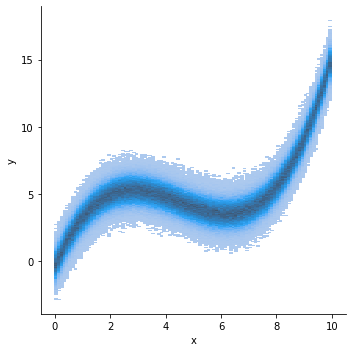

In [ ]:
import seaborn as sns
f_dist = sns.displot(data,x="x", y="y")

### Ploting P(X,Y) (with hover)

In [ ]:
s = 10000000
x = np.random.uniform(10,size=(1,s))
y_dn = np.apply_along_axis(func1d= f ,axis=1,arr=x)
y_dn += np.random.normal(loc=0,scale=np.sqrt(2),size=(1,s))
xedges = np.linspace(0,10,100)
yedges = np.linspace(0,20,100)
H, xedges, yedges = np.histogram2d(x.ravel(), y_dn.ravel(), bins=(xedges, yedges))
H /= s # normalize
H = H.T  # Let each row list bins with common y range.

X, Y = np.meshgrid(xedges + ((xedges[1] - xedges[0]) / 2 )
                   ,yedges + ((yedges[1] - yedges[0]) / 2 ))
Z = np.random.randint(100,size=(200,200))
fig = go.Figure(data=[go.Surface(x=X,y=Y,z=H)],
                layout=go.Layout(xaxis_range = (0,10),yaxis_range = (-4,20),height=600,width=600,))
fig.show()

## Average function (from samples)

In [ ]:
def average_f(X: np.array,Y: np.array,a: float,b: float):
  """
  Given datasets with samples computes the average function.
  X: matrix of x with shape (datasets,samples)
  Y: matrix of y with shape (datasets,samples)
  a: min x range
  b: max x range

  """
  assert X.shape == Y.shape
  
  datasets, samples = X.shape

  fs = [interp1d(X[i,:], Y[i,:],'linear',bounds_error=False) for i in range(datasets)]

  # define common carrier for calculation of average curve
  x_all = np.linspace(a,b, num=101)
  
  # evaluation of fits on common carrier
  f_ints = [f(x_all) for f in fs]

  # put all fits to one matrix for fast mean calculation
  data_collection = np.vstack(f_ints)

  # calculating mean value
  f_avg_points = np.average(data_collection, axis=0)

  f_avg = interp1d(x_all,f_avg_points,bounds_error=False)

  return f_avg_points , f_avg

In [ ]:
#f_avg_points , f_avg = average_f(x_datasets,y_datasets_w_noise,a,b)
#plt.scatter(np.linspace(0, 10, num=101),f_avg_points,color='orange')
#plt.plot(true_f_x,true_f_y)

## Plot Bias Variance

In [ ]:
def plot_bias_variance(x_datasets,preds,h_avg,y_datasets_w_noise,f_avg):
  x_domain = np.linspace(0, 10, num=101)

  fig, ax = plt.subplots(figsize = (16,9))
  
  ax.scatter(x_datasets.ravel(),preds.ravel(),alpha=0.1,color='orange')
  ax.plot(x_domain,h_avg(x_domain),color='orange')
  ax.scatter(x_datasets.ravel(),y_datasets_w_noise.ravel(),alpha=0.1,color='blue')
  ax.plot(x_domain,f_avg(x_domain),color='violet')

  return fig, ax

In [ ]:
#fig , ax = plot_bias_variance(x_datasets,preds,h_avg,y_datasets_w_noise,f_avg)

\begin{align*}
\underbrace{ \mathbb{E}_{\mathbb{x},y,D} \Big[{(h_D(\mathbb{x})−y)}^2 \Big] }_{\text{Expected Test Error}}= \underbrace{\mathbb{E}_{\mathbb{x},D} \Big[ {(h_D(\mathbb{x})−\bar{h}(\mathbb{x}))}^2\Big]}_{\text{Variance}} + \underbrace{ \mathbb{E}_{\mathbb{x}} \Big[{(\bar{h}(\mathbb{x})−\bar{y}(\mathbb{x}))}^2\Big] }_{\text{Bias}^2} + \underbrace{ \mathbb{E}_{\mathbb{x},y}\Big[(\bar{y}(x)−y)^2\Big] }_{\text{Noise}}
\end{align*}

In [ ]:
def avg_square_diff(a,b,sel=None):
  """
  Average square difference between two tensors with same shape
  """
  a.shape == b.shape
  if sel is None:
    sel = np.ones(a.shape, dtype=bool).ravel()
  return np.nanmean((a.ravel()[sel] - b.ravel()[sel] )**2)

In [ ]:
def compute_error_decomposition_test(d,x_test,preds_test,h_avg,f_avg,y_test_w_noise,x_min,x_max):
  sel = (np.tile(x_test,(d,1)).ravel() > x_min) & ((np.tile(x_test,(d,1)).ravel() < x_max))
  variance = avg_square_diff(preds_test,h_avg(np.tile(x_test,(d,1))),sel)
  
  sel = (x_test.ravel() > x_min) & (x_test.ravel() < x_max)
  bias2 = avg_square_diff(h_avg(x_test),f_avg(x_test),sel)
  noise = avg_square_diff(f_avg(x_test),y_test_w_noise,sel)

  sel = (np.tile(x_test,(d,1)).ravel() > x_min) & ((np.tile(x_test,(d,1)).ravel() < x_max))
  test_error = avg_square_diff(preds_test,np.tile(y_test_w_noise,(d,1)),sel)
  return {"test_error":test_error,"variance":variance,"bias2":bias2,"noise":noise}

In [ ]:
def display_result(test_error,variance,bias2,noise):
  res = f"Test Error: {test_error} = Variance: {variance} + Bias^2: {bias2} + Noise: {noise} \n {test_error} = {variance + bias2 + noise}"
  print(res)

In [ ]:
#display_result(**compute_error_decomposition_test(x_test,preds_test,h_avg,y_test_w_noise))

## Train different models and compute metrics

In [ ]:
def complexity_analysis(x_datasets,y_datasets_w_noise,x_test,y_test_w_noise,a,b):
  
  assert x_datasets.shape == y_datasets_w_noise.shape
  # Infer d,n from x_dataset
  d,n = x_datasets.shape

  results = {}
  for max_depth in range(1,10):
    models = []
    preds = np.zeros([d,n])
    for i in range(d):
      reg = tree.DecisionTreeRegressor(max_depth=max_depth).fit(x_datasets[i,:].reshape(-1,1), y_datasets_w_noise[i,:].reshape(-1,1))
      pred = reg.predict(x_datasets[i,:].reshape(-1,1)).ravel()
      models.append(reg)
      preds[i,:] = pred

    # Use the d models that we train with the training data and make them predict
    # for the test set
    preds_test = np.zeros((d,n_test))
    for i in range(d):
      preds_test[i,:] = models[i].predict(x_test.reshape(-1,1)).ravel()

    f_avg_points , f_avg = average_f(x_datasets,y_datasets_w_noise,a,b)
    f_avg = np.vectorize(lambda x :  (0.45*x-2)**3 - 0.55*(0.2*x-3)**2-2.5*(0.5*x-3)+ 5) # True function that we would like to learn
    h_avg_points , h_avg = average_f(np.tile(x_test,(d,1)),preds_test,a,b)

    fig,ax = plot_bias_variance(x_datasets,preds,h_avg,y_datasets_w_noise,f_avg)

    x_min = a
    x_max = b
    results[max_depth] = {"plot":(fig,ax),"values":compute_error_decomposition_test(d,x_test,preds_test,h_avg,f_avg,y_test_w_noise,x_min,x_max)}
  return results

In [ ]:
def complexity_analysis_results_to_numpy(results):
  """
  Transforms results into a tuple of arrays for plotting.
  results: output of complexity_analysis function
  """
  inds = np.array([i for i,d in results.items()])
  test_errors = np.array([d["values"]["test_error"] for i,d in results.items()])
  vars = np.array([d["values"]["variance"] for i,d in results.items()])
  biases = np.array([d["values"]["bias2"] for i,d in results.items()])
  noises = np.array([d["values"]["noise"] for i,d in results.items()])
  test_errors_min_ind = np.argmin(test_errors)

  return (inds,test_errors,vars,biases,noises,test_errors_min_ind)

In [ ]:
def plot_bias_var_to(inds,test_errors,vars,biases,noises,test_errors_min_ind):
  fig, ax = plt.subplots(figsize = (16,9))

  ax.plot(inds,test_errors,label='test error')
  ax.plot(inds[test_errors_min_ind], test_errors[test_errors_min_ind], 'ro', label= 'Minimum Test Error')
  ax.plot(inds,vars,'--',label='variance')
  ax.plot(inds,biases,'--',label='bias')
  ax.plot(inds,noises,'--',label='noise')
  plt.xlabel("Complexity (tree: max_depth)")
  plt.title("Bias-Variance Tradeoff")
  plt.legend()

## Experiment 1

In [ ]:
d = 5 # number of training datasets 
n = 100 # samples per training dataset
a, b = 0,10 # x domain range (a,b)
f = np.vectorize(lambda x :  (0.45*x-2)**3 - 0.55*(0.2*x-3)**2-2.5*(0.5*x-3)+ 5) # True function that we would like to learn
var = 0.5 # Noise to add to the true function

d_test = 1 # number of test datasets 
n_test = 20 # samples per test dataset

In [ ]:
x_trains, y_trains = generate_datasets(d,n,f,a,b,var)
x_tests, y_tests = generate_datasets(d_test,n_test,f=f,a=a,b=b,var=var)

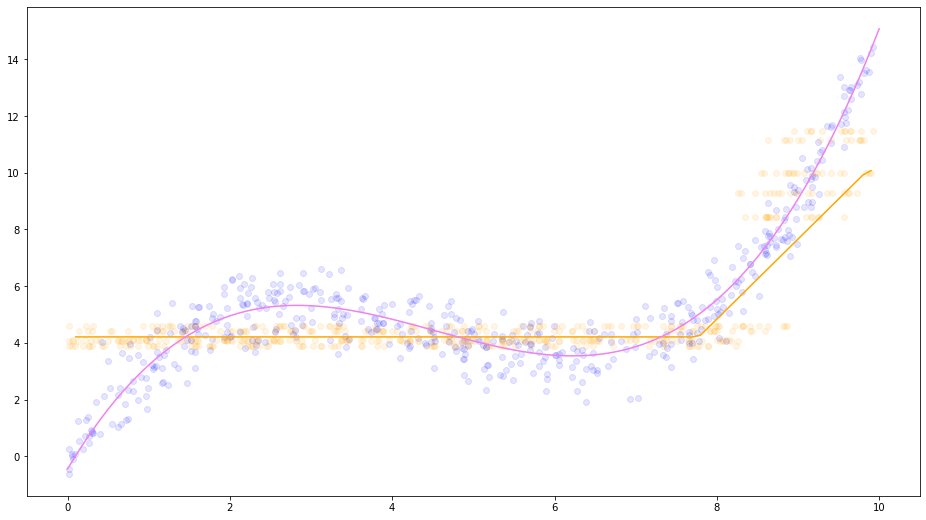

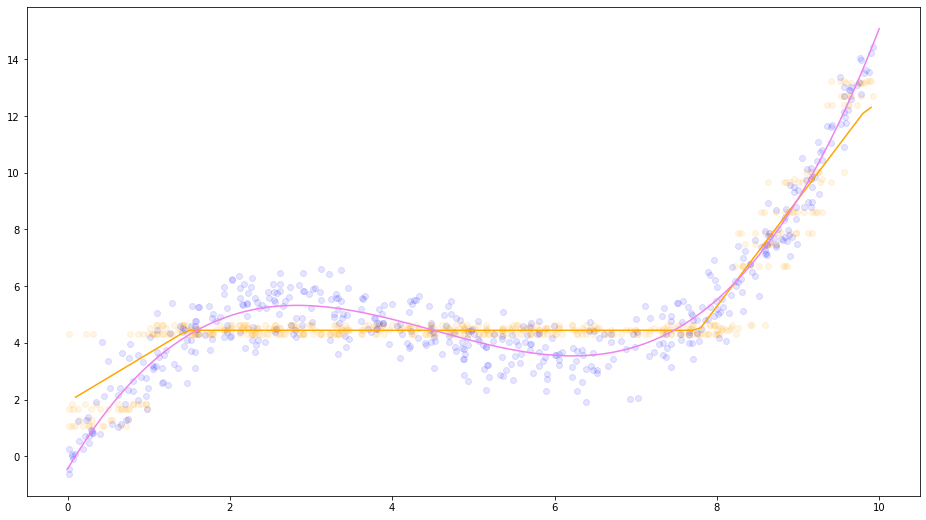

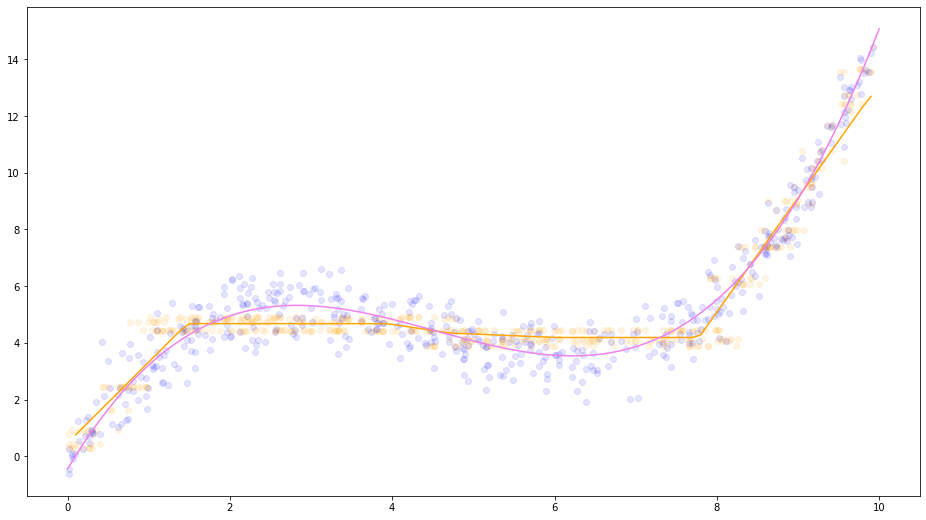

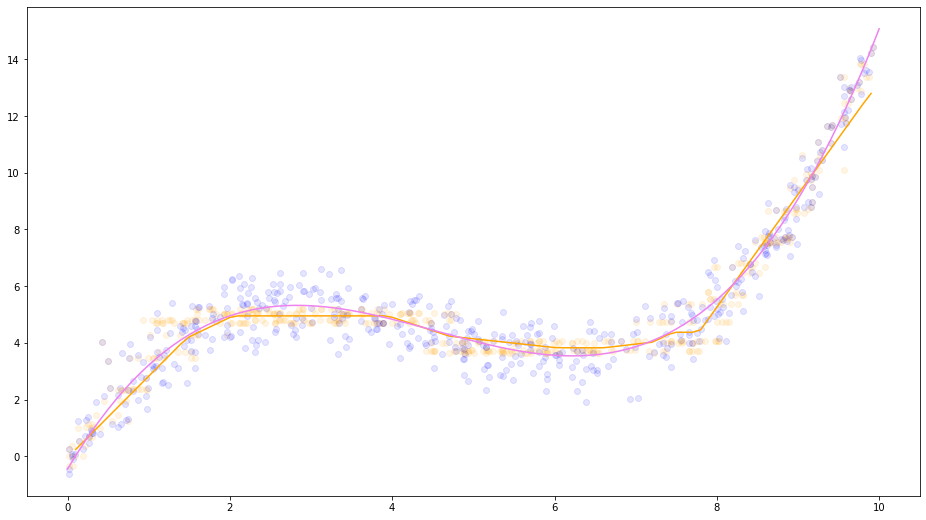

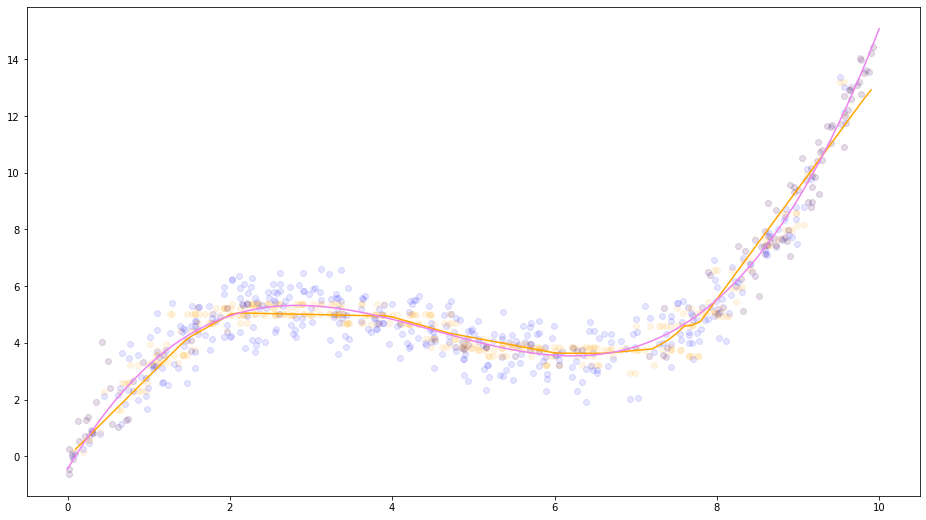

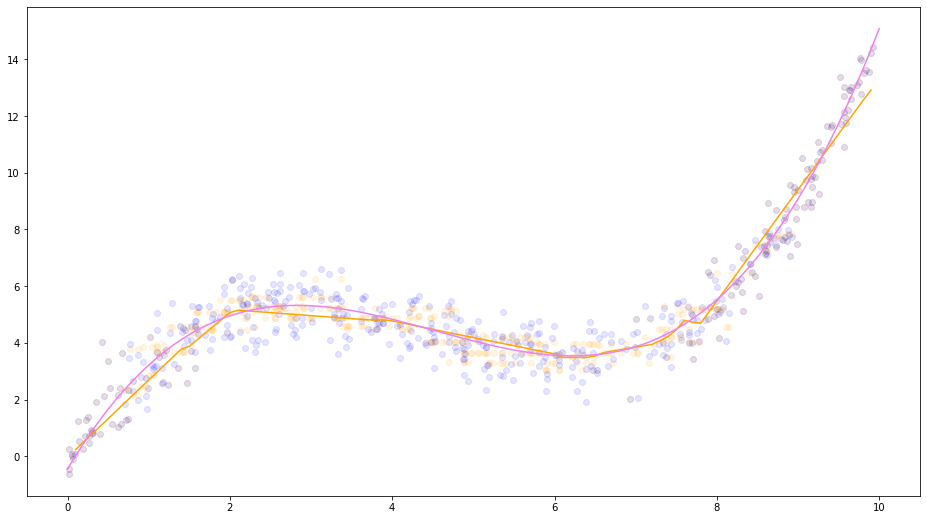

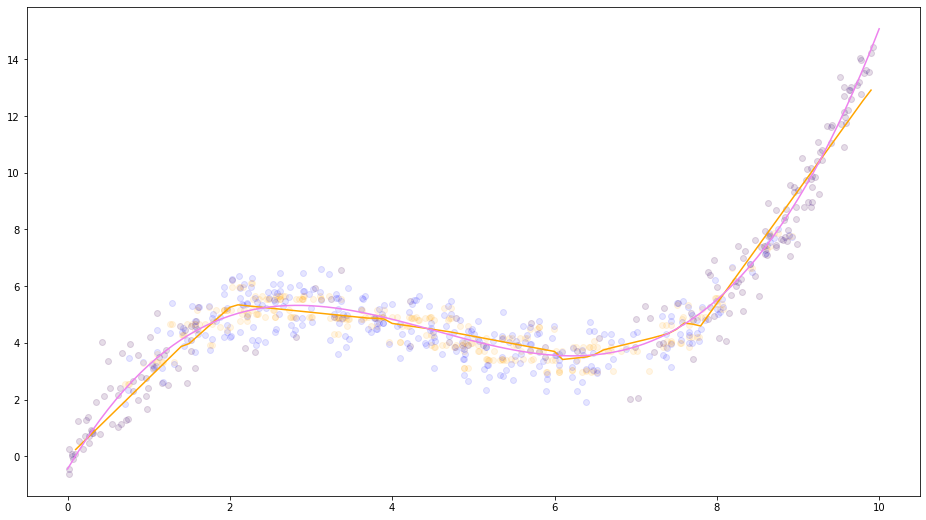

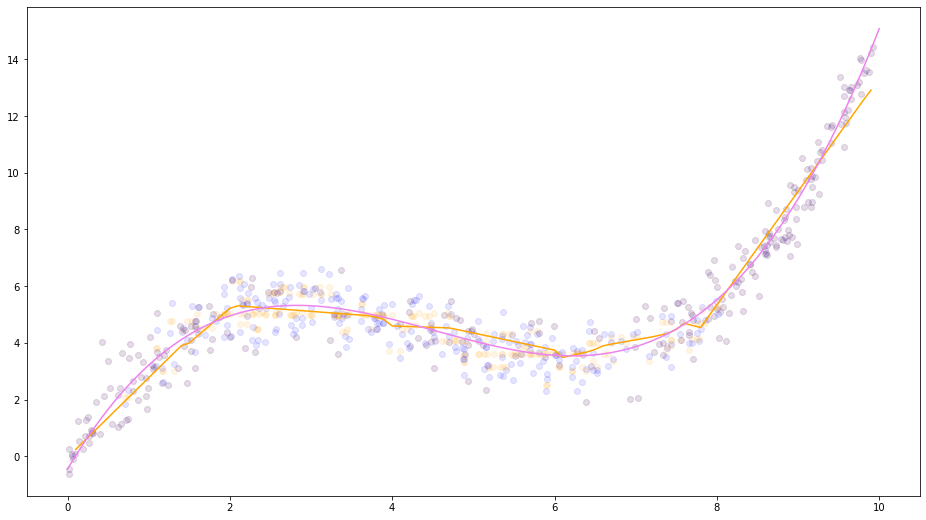

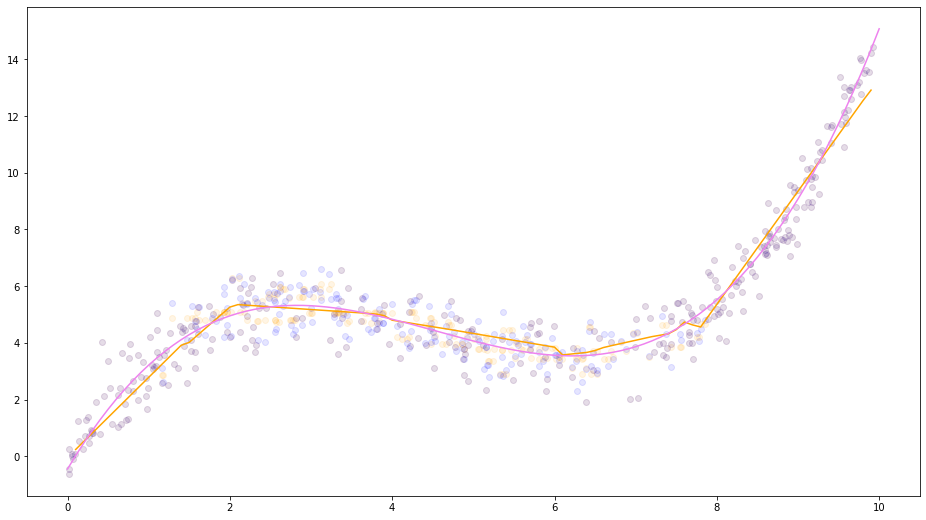

In [ ]:
results = complexity_analysis(x_trains,y_trains,x_tests,y_tests,a,b)

## Experiment 1: Results

Vemos que a medida que el modelo es más complejo:
- El sesgo (bias) se reduce.
- La varianza (variance) aumenta.
- El ruido se mantiene igual.

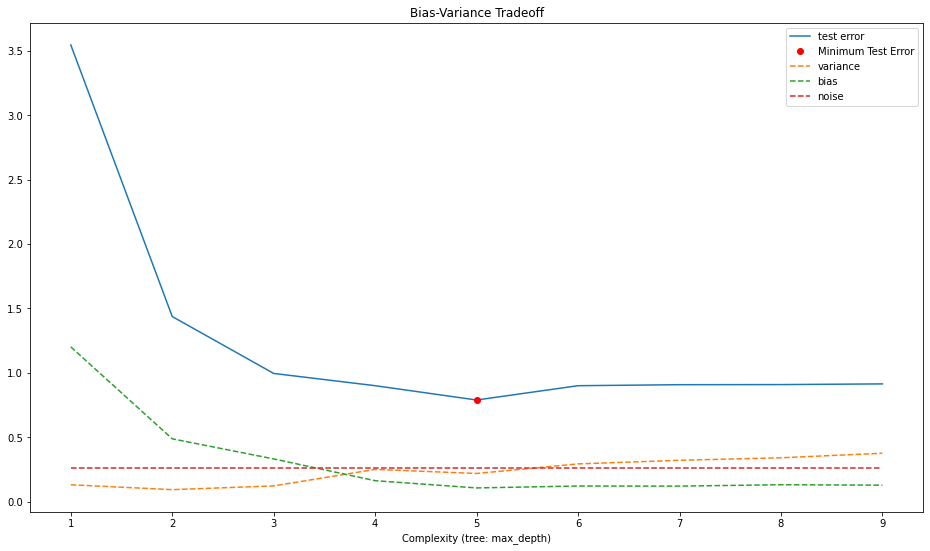

In [ ]:
plot_bias_var_to(*complexity_analysis_results_to_numpy(results))

## Experiment 2

Veamos que pasa cuando usamos más data.

In [ ]:
d = 5 # number of datasets to create
n = 500 # samples per dataset
a, b = 0,10 # x domain range (a,b)
f = np.vectorize(lambda x :  (0.45*x-2)**3 - 0.55*(0.2*x-3)**2-2.5*(0.5*x-3)+ 5) # True function that we would like to learn
var = 0.5 # Noise to add to the true function

d_test = 1
n_test = 200

In [ ]:
x_trains, y_trains = generate_datasets(d,n,f,a,b,var)
x_tests, y_tests = generate_datasets(d_test,n_test,f=f,a=a,b=b,var=var)

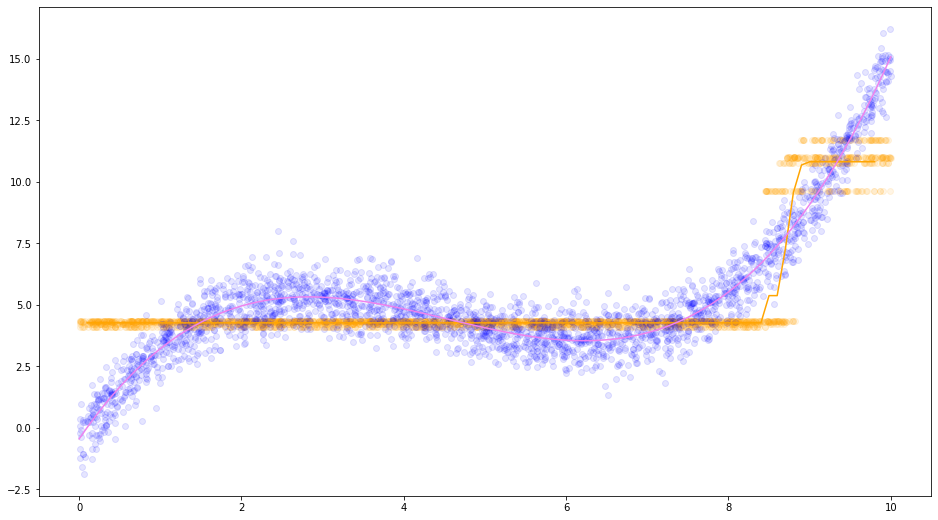

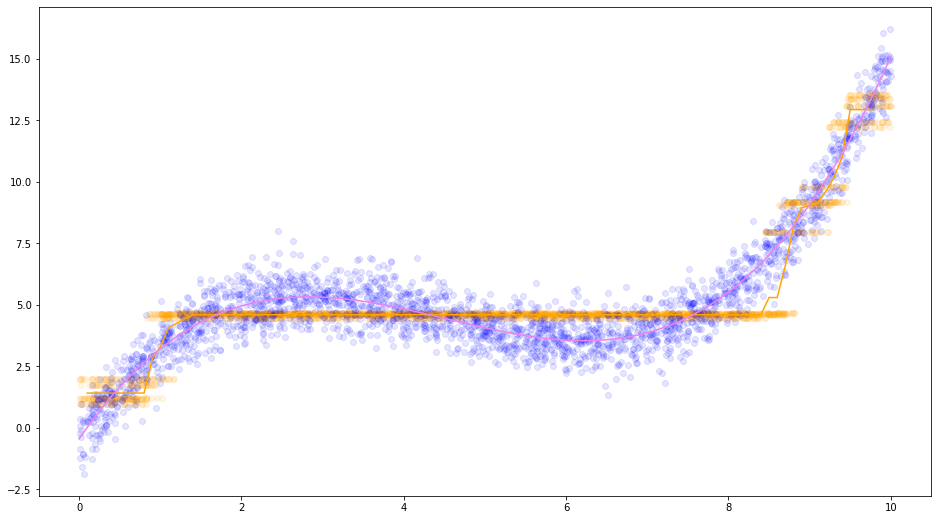

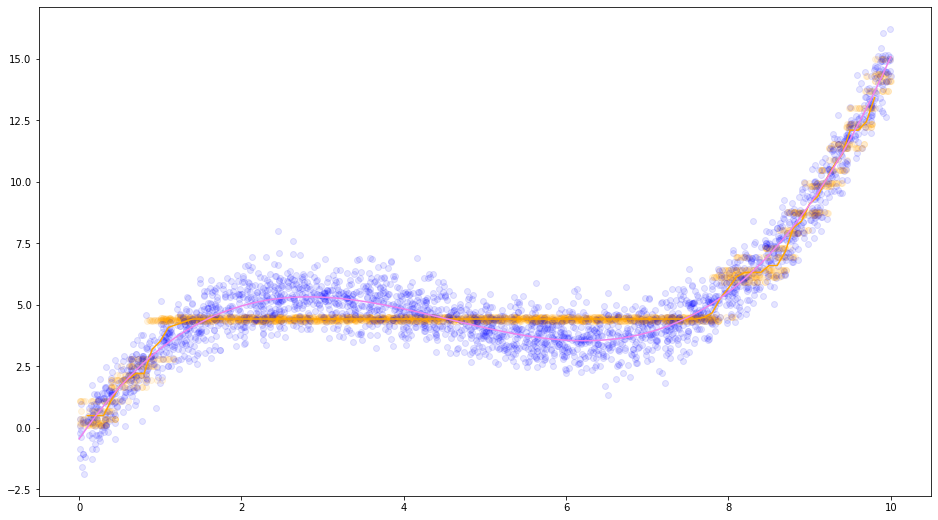

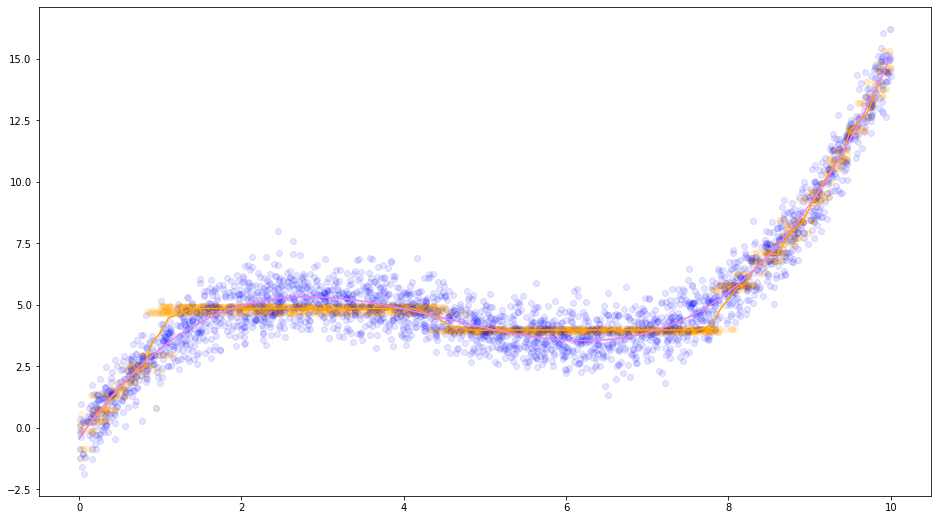

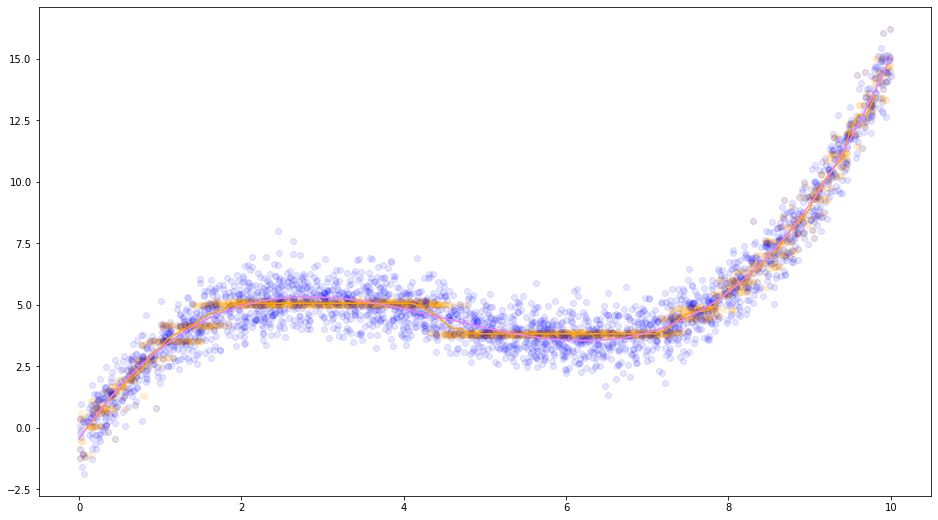

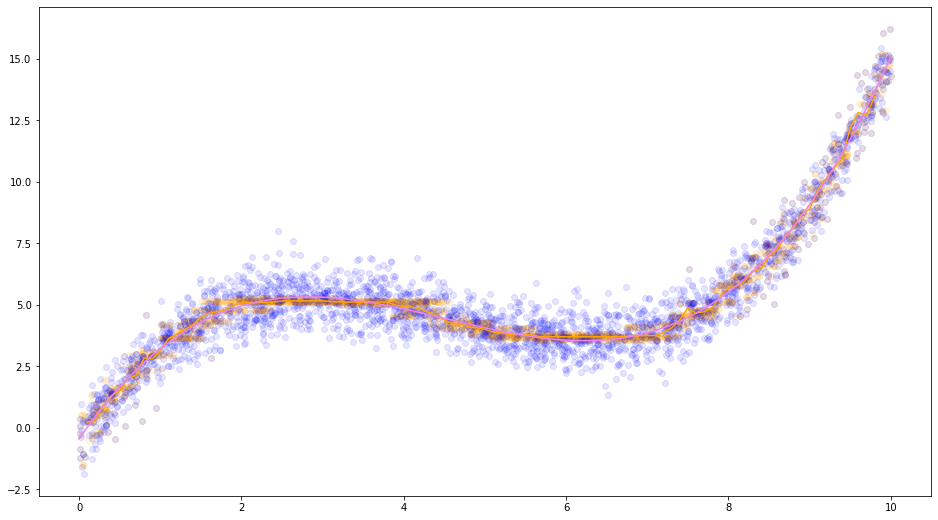

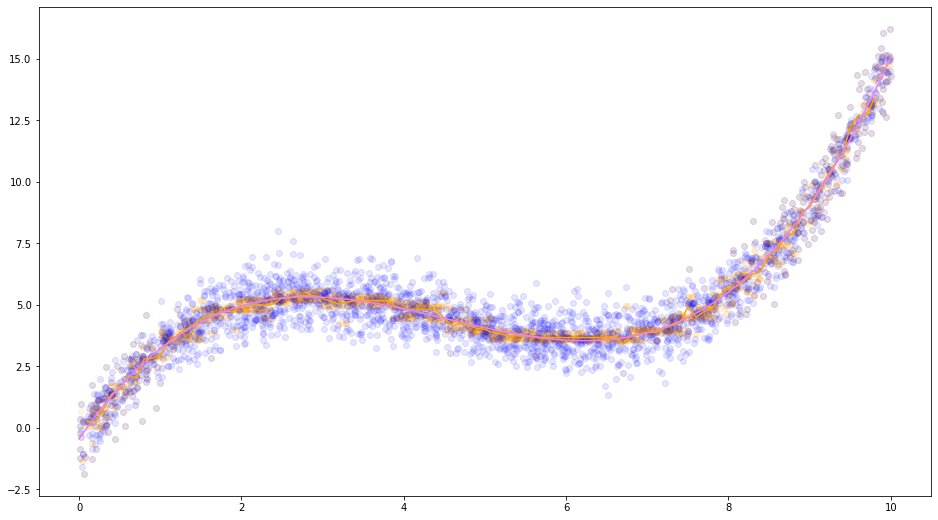

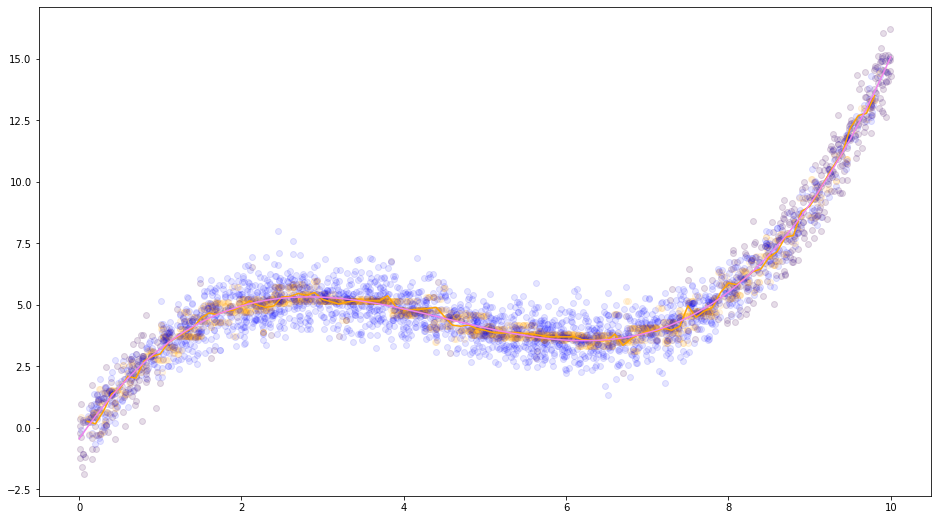

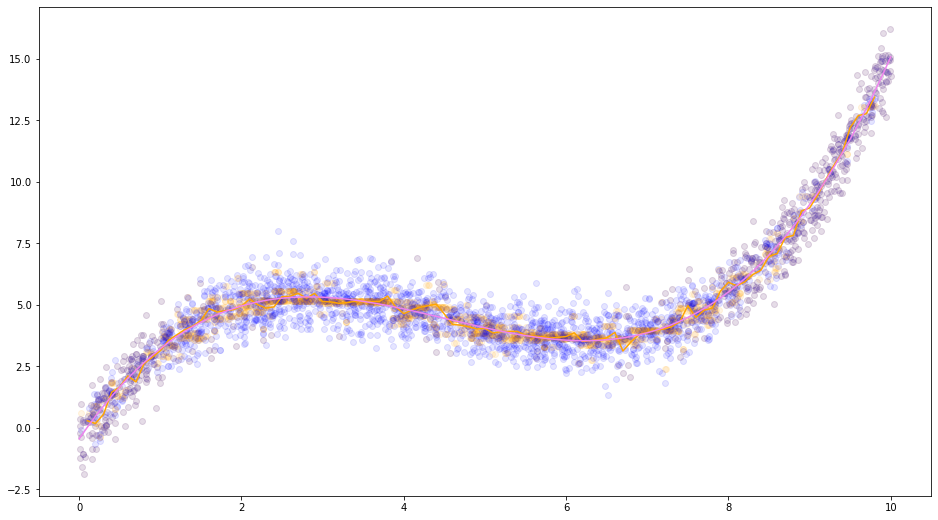

In [ ]:
results =  complexity_analysis(x_trains,y_trains,x_tests,y_tests,a,b)

## Experiment 2: Results

Vemos que el aumentar la cantidad de nuestros datos, la performance de nuestro modelo mejora (pero el limite a esa mejora es el ruido).

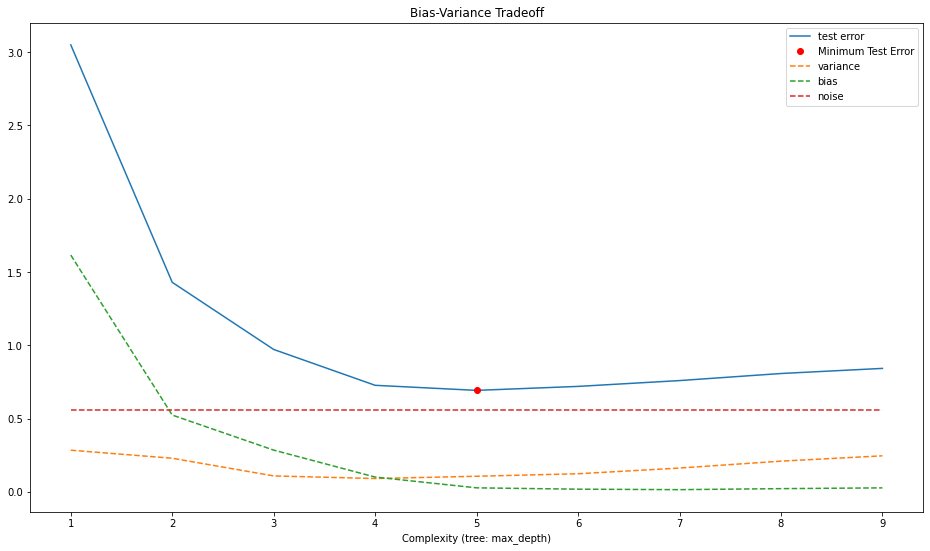

In [ ]:
plot_bias_var_to(*complexity_analysis_results_to_numpy(results))

## Appendix

## Expectation of a function

The expectation of a function $f(x)$ can be approaximated by

$$ \mathbb{E}_{x}[f] \simeq \frac{1}{N} \sum_{n=1}^{N} f(x_n)$$

,with this approximation becoming exact in the limit $N \to \infty$ ({cite}`bishop_pattern_2007` Page 20).

## Notación

Muchos de mis dificultades al estudiar ML vienen de la notación. Aprender a "leer matemáticas", para poder después "hablar" y escribir esa lengua es fundamental.

## Ejemplo 1:

$X \sim \mathcal{N}(\mu,\sigma^2)$, se lee, la variable aleatoria $X$ tiene una distribución normal con media $\mu$ y desvio standard $\sigma$ (varianza $\sigma^2$). Por otra parte, cuando quiero describir la densidad de probabilidad $p(x)$, puedo usar $p(x) = \mathcal{N}(x | \mu,\sigma^2)$. En este caso, $p(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\text{exp} \Big\{-\frac{1}{2\sigma^2}(x-\mu)^2\Big\}$.

# References

```{bibliography} ./references.bib
:filter: docname in docnames
```


Bias-Variance trade-off with other loss functions and for other problems ( classification)

https://homes.cs.washington.edu/~pedrod/bvd.pdf

https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part9.pdf

https://web.engr.oregonstate.edu/~tgd/classes/534/slides/part9.pdf

https://people.eecs.berkeley.edu/~jrs/189s19/lec/12.pdf

http://cs229.stanford.edu/summer2020/BiasVarianceAnalysis.pdf

https://towardsdatascience.com/the-bias-variance-tradeoff-8818f41e39e9